In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing Data

heart=pd.read_csv("heart.csv")


In [3]:
# Making copy of the imported data

df=heart.copy()

In [4]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
# syntax to print total number of columns & rows
df.shape

(303, 14)

In [6]:
# Printing information of all the columns present in a dataset 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Describing a dataset to get min, max, mean, median values of a dataset 

df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# Syntax to check the duplicate rows  in a dataset

duplicate_rows = df.duplicated()

In [9]:
duplicate_rows

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [10]:
# Another way to check the duplicate rows  in a dataset

df.duplicated().sum()

1

In [11]:
# syntax to remove duplicated rows

new_df=df.drop_duplicates()
new_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [12]:
# Syntax to find null values in table

new_df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [13]:
# Syntax to check for unique values in a dataset

new_df["age"].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

In [14]:
new_df["sex"].unique()

array([1, 0], dtype=int64)

In [15]:
new_df["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

In [16]:
new_df["trtbps"].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164], dtype=int64)

In [17]:
new_df["chol"].unique()

array([233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266,
       211, 283, 219, 340, 226, 247, 234, 243, 302, 212, 175, 417, 197,
       198, 177, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321,
       325, 235, 257, 216, 256, 231, 141, 252, 201, 222, 260, 182, 303,
       265, 309, 186, 203, 183, 220, 209, 258, 227, 261, 221, 205, 240,
       318, 298, 564, 277, 214, 248, 255, 207, 223, 288, 160, 394, 315,
       246, 244, 270, 195, 196, 254, 126, 313, 262, 215, 193, 271, 268,
       267, 210, 295, 306, 178, 242, 180, 228, 149, 278, 253, 342, 157,
       286, 229, 284, 224, 206, 167, 230, 335, 276, 353, 225, 330, 290,
       172, 305, 188, 282, 185, 326, 274, 164, 307, 249, 341, 407, 217,
       174, 281, 289, 322, 299, 300, 293, 184, 409, 259, 200, 327, 237,
       218, 319, 166, 311, 169, 187, 176, 241, 131], dtype=int64)

In [18]:
new_df["fbs"].unique()

array([1, 0], dtype=int64)

In [19]:
new_df["restecg"].unique()

array([0, 1, 2], dtype=int64)

In [20]:
new_df["thalachh"].unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90],
      dtype=int64)

In [21]:
new_df["exng"].unique()

array([0, 1], dtype=int64)

In [22]:
new_df["oldpeak"].unique()

array([2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 0.5, 1.6, 1.2, 0.2, 1.8,
       1. , 2.6, 1.5, 3. , 2.4, 0.1, 1.9, 4.2, 1.1, 2. , 0.7, 0.3, 0.9,
       3.6, 3.1, 3.2, 2.5, 2.2, 2.8, 3.4, 6.2, 4. , 5.6, 2.9, 2.1, 3.8,
       4.4])

In [23]:
new_df["slp"].unique()

array([0, 2, 1], dtype=int64)

In [24]:
new_df["caa"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [25]:
new_df["thall"].unique()

array([1, 2, 3, 0], dtype=int64)

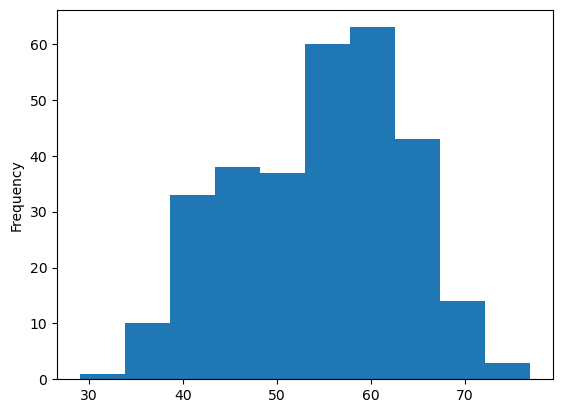

In [26]:
# Syntax to plot the histogram to check how the data in a particular column is distributed

new_df["age"].plot.hist()
plt.show()

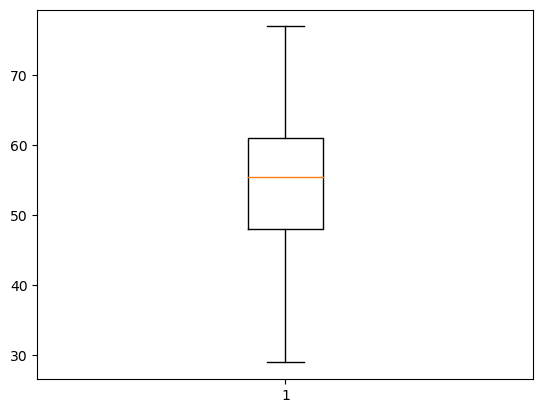

In [27]:
# Syntax to plot boxplot of each column in a dataset 

plt.boxplot(new_df["age"])
plt.show()

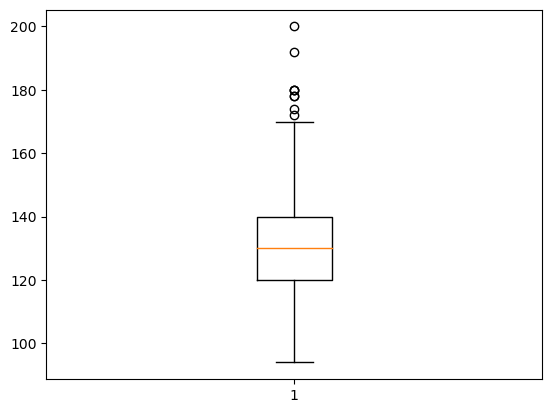

In [28]:
plt.boxplot(new_df["trtbps"])
plt.show()

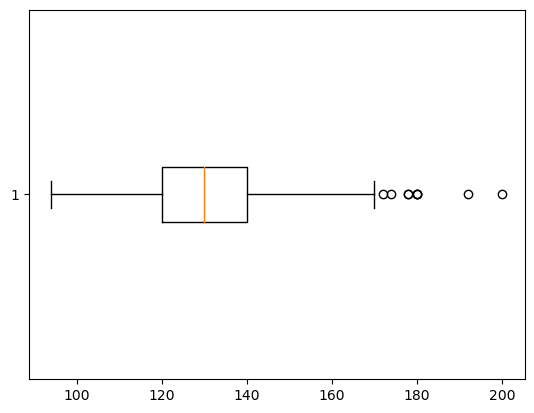

In [29]:
# Syntax to plot boxplot horizontally

plt.boxplot(new_df["trtbps"], vert=False)
plt.show()

In [30]:
# Syntax to check for outlier in given (quantile(0.98)) quantile range

out1=new_df["trtbps"][new_df["trtbps"] > new_df["trtbps"].quantile(0.98)]

In [31]:
out1

101    178
110    180
203    180
223    200
248    192
260    178
266    180
Name: trtbps, dtype: int64

In [32]:
# Syntax to replace outlier with the mean of the particular column by using np.where function 

# numpy.where(condition, x, y)
# import numpy as np

#arr = np.array([1, 2, 3, 4, 5])
#condition = np.array([True, False, True, False, True])
#result = np.where(condition, arr, 0)
#print(result)

#[1 0 3 0 5]

new_df['trtbps'] = np.where(new_df['trtbps'].isin(out1), new_df['trtbps'].mean(), new_df['trtbps'])
new_df['trtbps']

0      145.0
1      130.0
2      130.0
3      120.0
4      120.0
       ...  
298    140.0
299    110.0
300    144.0
301    130.0
302    130.0
Name: trtbps, Length: 302, dtype: float64

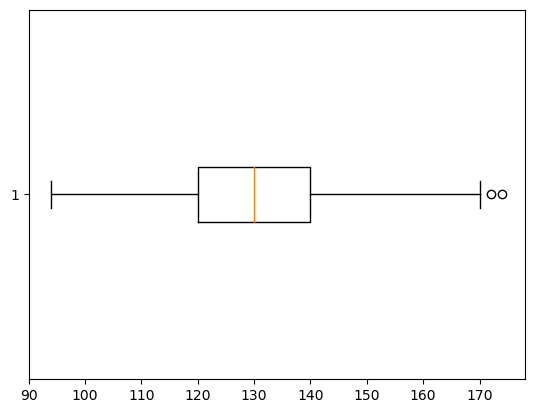

In [33]:
plt.boxplot(new_df["trtbps"], vert=False)
plt.show()

In [34]:
out1=new_df["trtbps"][new_df["trtbps"] > new_df["trtbps"].quantile(0.99)]

In [35]:
out1

8      172.0
241    174.0
Name: trtbps, dtype: float64

In [36]:
new_df['trtbps'] = np.where(new_df['trtbps'].isin(out1), new_df['trtbps'].mean(), new_df['trtbps'])
new_df['trtbps']

0      145.0
1      130.0
2      130.0
3      120.0
4      120.0
       ...  
298    140.0
299    110.0
300    144.0
301    130.0
302    130.0
Name: trtbps, Length: 302, dtype: float64

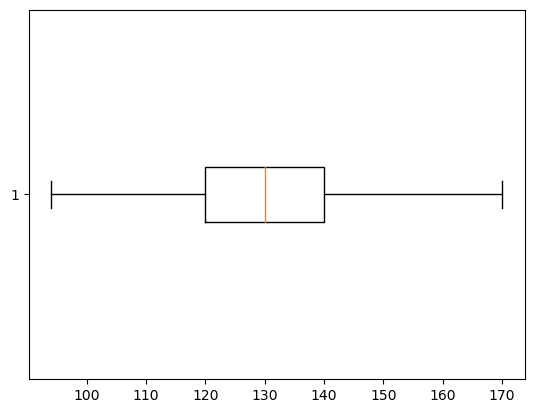

In [37]:
plt.boxplot(new_df["trtbps"], vert=False)
plt.show()

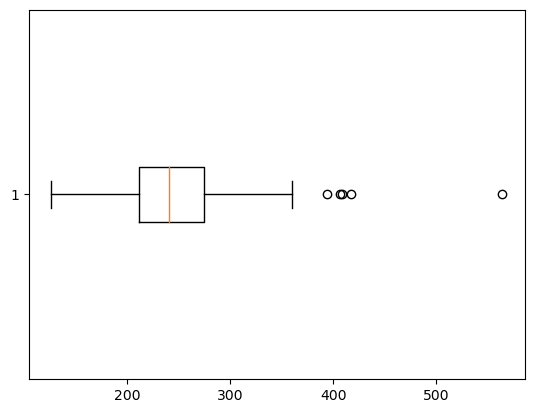

In [38]:
plt.boxplot(new_df["chol"], vert=False)
plt.show()

In [39]:
out2=new_df["chol"][new_df["chol"] > new_df["chol"].quantile(0.98)]
out2

4      354
28     417
39     360
85     564
96     394
220    407
246    409
Name: chol, dtype: int64

In [40]:
new_df['chol'] = np.where(new_df['chol'].isin(out2), new_df['chol'].mean(), new_df['chol'])
new_df['chol']

0      233.0
1      250.0
2      204.0
3      236.0
4      246.5
       ...  
298    241.0
299    264.0
300    193.0
301    131.0
302    236.0
Name: chol, Length: 302, dtype: float64

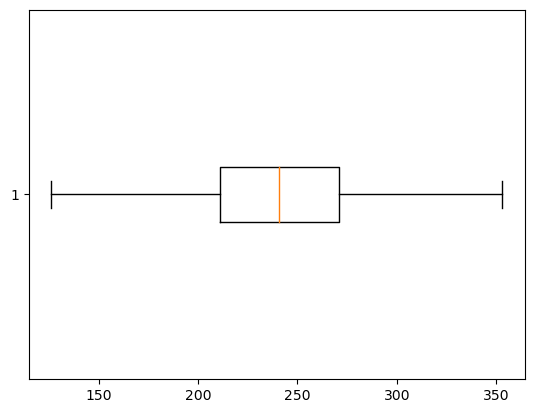

In [41]:
plt.boxplot(new_df["chol"], vert=False)
plt.show()

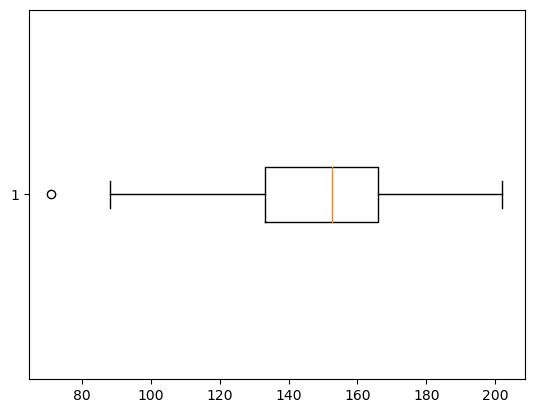

In [42]:
plt.boxplot(new_df["thalachh"], vert=False)
plt.show()

In [43]:
out3=new_df["thalachh"][new_df["thalachh"] < new_df["thalachh"].quantile(0.01)]
out3

243    88
262    95
272    71
297    90
Name: thalachh, dtype: int64

In [44]:
new_df = new_df[new_df["thalachh"]!=71]

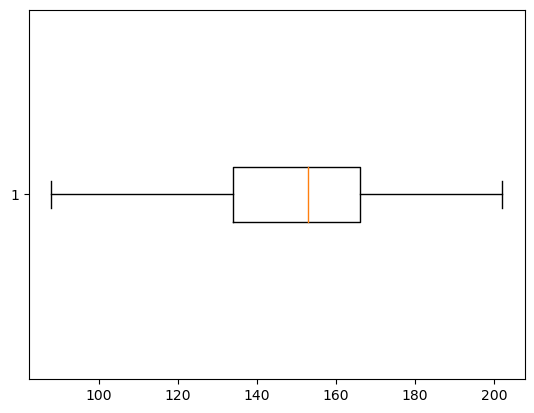

In [45]:
plt.boxplot(new_df["thalachh"], vert=False)
plt.show()

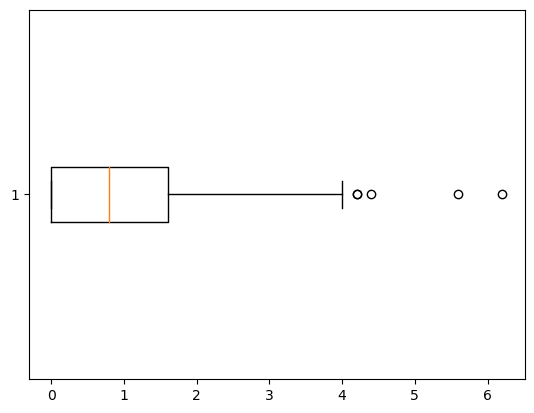

In [46]:
plt.boxplot(new_df["oldpeak"], vert=False)
plt.show()

In [47]:
out4=new_df["oldpeak"][new_df["oldpeak"] > new_df["oldpeak"].quantile(0.98)]
out4

101    4.2
204    6.2
221    5.6
250    4.2
291    4.4
Name: oldpeak, dtype: float64

In [48]:
new_df['oldpeak'] = np.where(new_df['oldpeak'].isin(out4), new_df['oldpeak'].mean(), new_df['oldpeak'])
new_df['oldpeak']

0      2.3
1      3.5
2      1.4
3      0.8
4      0.6
      ... 
298    0.2
299    1.2
300    3.4
301    1.2
302    0.0
Name: oldpeak, Length: 301, dtype: float64

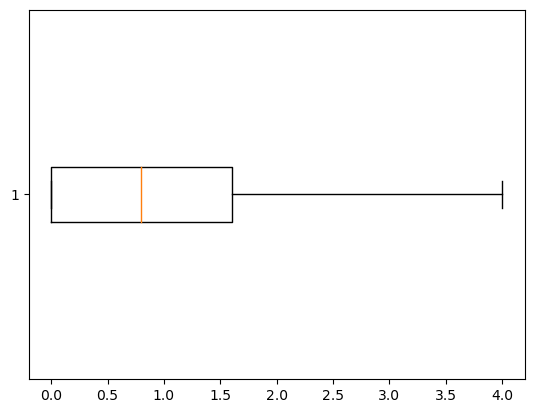

In [49]:
plt.boxplot(new_df["oldpeak"], vert=False)
plt.show()

<Axes: >

<Figure size 800x200 with 0 Axes>

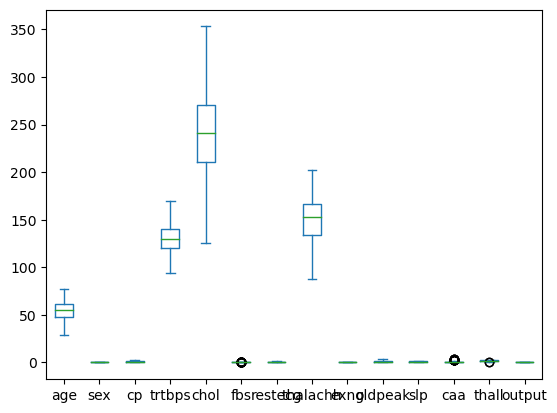

In [50]:
plt.figure(figsize=(8,2))
new_df.plot.box()

In [51]:
new_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,54.378738,0.681063,0.966777,130.139518,242.612957,0.149502,0.524917,149.830565,0.328904,0.978791,1.398671,0.720930,2.315615,0.544850
std,9.033793,0.466841,1.032259,15.164259,43.716117,0.357176,0.526191,22.487208,0.470597,1.042807,0.616872,1.007568,0.613777,0.498814
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,271.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,353.000000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,4.000000,3.000000,1.000000


In [52]:
new_df["output"].value_counts()

1    164
0    137
Name: output, dtype: int64

In [53]:
# Resampling output column data in upsample(i.e majority value)

majority=new_df[new_df["output"]==0]
majority.shape

(137, 14)

In [54]:
minority=new_df[new_df["output"]==1]
minority.shape

(164, 14)

In [55]:
majority.drop("output", axis=1, inplace=True)
minority.drop("output", axis=1, inplace=True)

In [56]:
upsample = resample(minority, 
                    replace=True,
                    n_samples=len(majority), 
                    random_state=53)

In [57]:
up_df = pd.concat([majority, upsample])

In [58]:
up_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
165,67,1,0,160.0,286.0,0,0,108,1,1.5,1,3,2
166,67,1,0,120.0,229.0,0,0,129,1,2.6,1,2,3
167,62,0,0,140.0,268.0,0,0,160,0,3.6,0,2,2
168,63,1,0,130.0,254.0,0,0,147,0,1.4,1,1,3
169,53,1,0,140.0,203.0,1,0,155,1,3.1,0,0,3


In [59]:
up_df.shape

(274, 13)

In [60]:
new_df1=pd.get_dummies(df,columns=['fbs','restecg','exng','slp','caa'])

In [61]:
new_df1.head()

,age,sex,cp,trtbps,chol,thalachh,oldpeak,thall,output,fbs_0,...,exng_0,exng_1,slp_0,slp_1,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4
0,63,1,3,145,233,150,2.3,1,1,0,...,1,0,1,0,0,1,0,0,0,0
1,37,1,2,130,250,187,3.5,2,1,1,...,1,0,1,0,0,1,0,0,0,0
2,41,0,1,130,204,172,1.4,2,1,1,...,1,0,0,0,1,1,0,0,0,0
3,56,1,1,120,236,178,0.8,2,1,1,...,1,0,0,0,1,1,0,0,0,0
4,57,0,0,120,354,163,0.6,2,1,1,...,0,1,0,0,1,1,0,0,0,0


In [62]:
# Import StandardScaler from sklearn to check the standard scalar value of each input column

from sklearn.preprocessing import StandardScaler

In [63]:
# Syntax to make a object of StandardScaler

std=StandardScaler()

In [64]:
new_df2=new_df1.copy()

In [65]:
# Syntax to fit the new scaler value data in new_df

new_df2[["age","trtbps", "chol", "thalachh", "oldpeak"]] = std.fit_transform(new_df2[["age","trtbps", "chol", "thalachh", "oldpeak"]])

In [66]:
# New standard value of the input columns

new_df2

,age,sex,cp,trtbps,chol,thalachh,oldpeak,thall,output,fbs_0,...,exng_0,exng_1,slp_0,slp_1,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4
0,0.952197,1,3,0.763956,-0.256334,0.015443,1.087338,1,1,0,...,1,0,1,0,0,1,0,0,0,0
1,-1.915313,1,2,-0.092738,0.072199,1.633471,2.122573,2,1,1,...,1,0,1,0,0,1,0,0,0,0
2,-1.474158,0,1,-0.092738,-0.816773,0.977514,0.310912,2,1,1,...,1,0,0,0,1,1,0,0,0,0
3,0.180175,1,1,-0.663867,-0.198357,1.239897,-0.206705,2,1,1,...,1,0,0,0,1,1,0,0,0,0
4,0.290464,0,0,-0.663867,2.082050,0.583939,-0.379244,2,1,1,...,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0,0,0.478391,-0.101730,-1.165281,-0.724323,3,0,1,...,0,1,0,1,0,1,0,0,0,0
299,-1.033002,1,3,-1.234996,0.342756,-0.771706,0.138373,3,0,1,...,1,0,0,1,0,1,0,0,0,0
300,1.503641,1,0,0.706843,-1.029353,-0.378132,2.036303,3,0,0,...,1,0,0,1,0,0,0,1,0,0
301,0.290464,1,0,-0.092738,-2.227533,-1.515125,0.138373,3,0,1,...,0,1,0,1,0,0,1,0,0,0


In [67]:
# Syntax to check the output column value difference

output_column = 'output'
output_stats = new_df['output'].describe()
print(output_stats)

count    301.000000
mean       0.544850
std        0.498814
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: output, dtype: float64


In [68]:
# Importing train_test_split from sklearn

from sklearn.model_selection import train_test_split

In [69]:
# Seprating input & Output column for training & Testing

X=new_df2.drop("output",axis=1)
y=new_df2["output"]

In [70]:
# Input columns

X.head()

,age,sex,cp,trtbps,chol,thalachh,oldpeak,thall,fbs_0,fbs_1,...,exng_0,exng_1,slp_0,slp_1,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4
0,0.952197,1,3,0.763956,-0.256334,0.015443,1.087338,1,0,1,...,1,0,1,0,0,1,0,0,0,0
1,-1.915313,1,2,-0.092738,0.072199,1.633471,2.122573,2,1,0,...,1,0,1,0,0,1,0,0,0,0
2,-1.474158,0,1,-0.092738,-0.816773,0.977514,0.310912,2,1,0,...,1,0,0,0,1,1,0,0,0,0
3,0.180175,1,1,-0.663867,-0.198357,1.239897,-0.206705,2,1,0,...,1,0,0,0,1,1,0,0,0,0
4,0.290464,0,0,-0.663867,2.082050,0.583939,-0.379244,2,1,0,...,0,1,0,0,1,1,0,0,0,0


In [71]:
# Output Columns

y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [72]:
# Training & Testing the data by giving the training size & Random state(will give same number of rows & Columns if we rerun the code)

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=23)
X_train.head(3)

,age,sex,cp,trtbps,chol,thalachh,oldpeak,thall,fbs_0,fbs_1,...,exng_0,exng_1,slp_0,slp_1,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4
184,-0.481558,1,0,1.049520,-0.063079,-0.946628,1.346147,3,1,0,...,1,0,0,1,0,1,0,0,0,0
51,1.283063,1,0,-0.663867,1.077125,0.059173,-0.551783,2,1,0,...,1,0,0,1,0,1,0,0,0,0
146,-1.143291,0,2,-0.778093,-0.082404,-0.028288,-0.638053,2,1,0,...,1,0,0,1,0,0,1,0,0,0


In [73]:
X_train.shape

(227, 23)

In [74]:
# Syntax to import logistic regression model from the sklearn

from sklearn.linear_model import LogisticRegression

In [75]:
model=LogisticRegression()

In [76]:
# Syntax to fit input & output data in Logistic Regression model

model.fit(X,y)

LogisticRegression()

In [77]:
training_score=model.score(X_train,y_train)

In [78]:
training_score

0.8722466960352423

In [79]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [80]:
y_pred=model.predict(X_test)

In [81]:
# Importing accuracy Score(training score), confusion matrix, classification report

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix 

In [82]:
accuracy_score(y_test,y_pred)

0.9078947368421053

In [83]:
confusion_matrix(y_test,y_pred)

array([[31,  5],
       [ 2, 38]], dtype=int64)

In [84]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.94      0.86      0.90        36\n           1       0.88      0.95      0.92        40\n\n    accuracy                           0.91        76\n   macro avg       0.91      0.91      0.91        76\nweighted avg       0.91      0.91      0.91        76\n'

In [85]:
import seaborn as sns

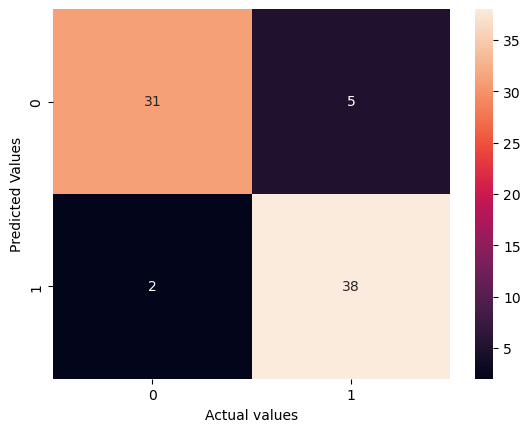

In [86]:
# Syntax to print the heatmap 

sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)
plt.xlabel("Actual values")
plt.ylabel("Predicted Values")
plt.show()

In [87]:
# Slope of line

m=model.coef_
m

array([[ 0.13905458, -1.59582315,  0.8362308 , -0.39365904, -0.14905566,
         0.4268644 , -0.55514717, -0.81779105, -0.07669347,  0.07729797,
        -0.13240624,  0.22943485, -0.09642412,  0.41030216, -0.40969767,
         0.06062319, -0.61483144,  0.55481275,  1.35735358, -0.53236471,
        -1.18674283, -0.35324108,  0.71559954]])

In [88]:
# Intercept of line

c= model.intercept_
c

array([1.67965124])

In [89]:
# sigmoid function

proba = 1 / (1 + (np.exp(-(m*([X])+c))))
proba


array([[[0.85961048, 0.52094476, 0.98505534, ..., 0.84285834,
         0.84285834, 0.84285834],
        [0.80428878, 0.52094476, 0.96617396, ..., 0.84285834,
         0.84285834, 0.84285834],
        [0.81376509, 0.84285834, 0.92524774, ..., 0.84285834,
         0.84285834, 0.84285834],
        ...,
        [0.86861173, 0.52094476, 0.84285834, ..., 0.62079134,
         0.84285834, 0.84285834],
        [0.84813419, 0.52094476, 0.84285834, ..., 0.84285834,
         0.84285834, 0.84285834],
        [0.84813419, 0.84285834, 0.92524774, ..., 0.84285834,
         0.84285834, 0.84285834]]])

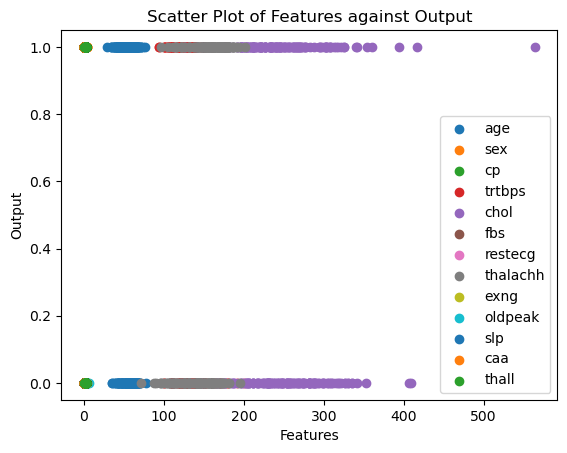

In [90]:
# Syntax to print the scatter plot of heart dataset

features = ["age", "sex", "cp", "trtbps", "chol", "fbs", "restecg", "thalachh", "exng", "oldpeak", "slp", "caa", "thall"]
target = "output"

for feature in features:
    plt.scatter(df[feature], df[target], label=feature)

plt.figsize=(16,8)
plt.xlabel("Features")
plt.ylabel("Output")
plt.title("Scatter Plot of Features against Output")
plt.legend()
plt.show()

# SVM MODEL

In [91]:
from sklearn.svm import SVC

In [92]:
svc=SVC(kernel='poly', degree=8)

In [93]:
svc.fit(X_train, y_train)

SVC(degree=8, kernel='poly')

In [94]:
svc.score(X_train,y_train)

0.9251101321585903

In [95]:
y_pred2=svc.predict(X_test)

In [96]:
accuracy_score(y_pred2,y_test)

0.8289473684210527

In [97]:
confusion_matrix(y_pred2,y_test)

array([[25,  2],
       [11, 38]], dtype=int64)

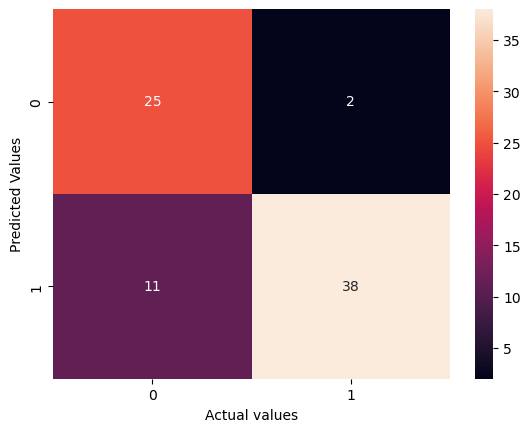

In [98]:
sns.heatmap(confusion_matrix(y_pred2,y_test), annot=True)
plt.xlabel("Actual values")
plt.ylabel("Predicted Values")
plt.show()

In [99]:
# Syntax to predict the output for input column

prediction=model.predict(X)
if (prediction[[0]]==0):
    print(prediction[[0]],"The Person does not have heart disease")
else:
    print(prediction[[0]],"The Person have heart disease")

[1] The Person have heart disease


# Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
model=RandomForestClassifier(max_depth=22, max_features=10, max_leaf_nodes=20, random_state=23) 

In [102]:
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=22, max_features=10, max_leaf_nodes=20,
                       random_state=23)

In [103]:
model.score(X_train,y_train)

0.9691629955947136

In [104]:
y_pred3=model.predict(X_test)

In [105]:
accuracy_score(y_test,y_pred3)

0.8421052631578947

# Decision Tree

In [106]:
from sklearn.tree import DecisionTreeClassifier

In [107]:
DTC= DecisionTreeClassifier()

In [108]:
DTC.fit(X_train, y_train)

DecisionTreeClassifier()

In [109]:
DTC.score(X_train, y_train)

1.0

In [110]:
y_pred4=DTC.predict(X_test)

In [111]:
y_pred4

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [112]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [114]:
accuracy_score(y_test, y_pred4)

0.8026315789473685

In [115]:
confusion_matrix(y_test, y_pred4)

array([[32,  4],
       [11, 29]], dtype=int64)

In [116]:
classification_report(y_test, y_pred4)

'              precision    recall  f1-score   support\n\n           0       0.74      0.89      0.81        36\n           1       0.88      0.72      0.79        40\n\n    accuracy                           0.80        76\n   macro avg       0.81      0.81      0.80        76\nweighted avg       0.82      0.80      0.80        76\n'

In [118]:
from sklearn import tree

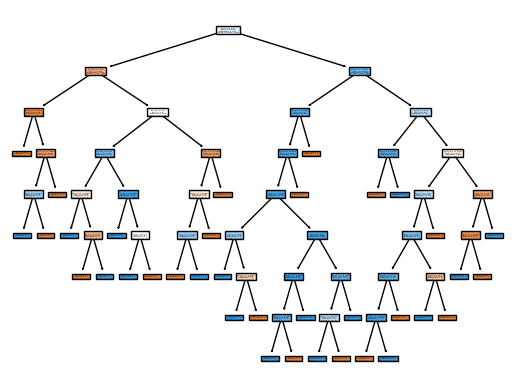

In [120]:
tree.plot_tree(DTC, filled=True)
plt.show()

In [121]:
from sklearn.model_selection import GridSearchCV

In [122]:
params={"criterion":["gini", "entropy"], "max_depth":[2,3,4,5,6], "max_features":[2,3,4,5]}

In [123]:
gr=GridSearchCV(estimator=DTC, param_grid=params, scoring="accuracy", n_jobs=-1, cv=10, verbose=True)

In [124]:
gr.fit(X_train, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': [2, 3, 4, 5]},
             scoring='accuracy', verbose=True)

In [125]:
gr.best_params_

{'criterion': 'gini', 'max_depth': 2, 'max_features': 5}

In [126]:
model2=DecisionTreeClassifier(criterion="gini", max_depth=2, max_features=5)

In [127]:
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_features=5)

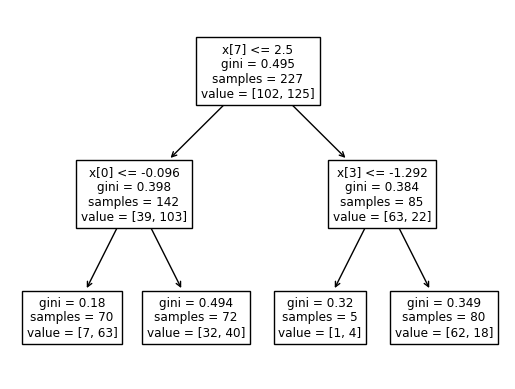

In [128]:
tree.plot_tree(model2)
plt.show()